# Poisson Distribution

This is again a discrete probability distribution which is modelled upon bernoulli trials. However, there are subtle differences between Binomial and Poisson Distribution. 

Poisson Distribution is actually used to model the events who are stochastic in nature, i.e. occurence of an event does not depend on the previous event nor the next one in the process (in similar lines to something called as a Markov Process). 


Following are the conditions required to classify a process in terms of Poisson Event: 

- The events should be independent wrt each other 
- There should be a predetermined rate at which events should occur, i.e. there should be a prior knowledge or estimate about average number of events occuring in a fixed time frame. 
- The individual events are similar to bernoulli events, i.e. two events cannot occur together and there are two outcomes, either an event occurs or it does not 

Following is the probability mass function given for Poisson Distribution: 


\begin{align*}
({{{\frac{events}{fixedtimeframe}}{time period}}})^{k}{\frac{e^{-({{\frac{events}{fixedtimeframe}}{time period}})}}{k!}}
\end{align*}

we call the parameter $({{{\frac{events}{fixedtimeframe}}{time period}}})^{k}$ as the rate parameter (second condition of the poisson distribution above) and denote it by ${\lambda}$ operator. Thus the above equation becomes: 



\begin{align*}
({\lambda})^{k}{\frac{e^{(-{\lambda})}}{k!}}
\end{align*}

#### Example: 


Suppose we have a pharmacy shop next to Colombia Hospital. We are interested in improving the inventory management of a drug named "XYZ" related to a very rare disease. Also, since it is a rare disease, based on the past experiences, we know that at an average 1 drug gets sold every 2 days. Since the replenishment cycle of this drug is every two weeks, we want to know how many units will be sold in that period. How can we model it? 

Here, we know that a drug is sold every 2 days at an average, thus the rate parameter becomes: 
\begin{align*} 
{\lambda} = {\frac{1}{2}}{14} = 7
\end{align*}

Since replenishment every 2 weeks, hence time period is 14 days. An event is occuring once in every 2 days, thus lambda would be 7

Now, we want to see the probabilities of 1 drug being sold in 2 weeks, or 2 drugs or 3,4.....20 say. This is model using the equation and the code below

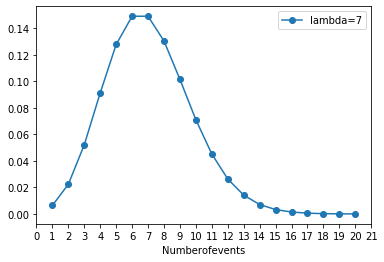

In [152]:
import numpy as np
import pandas as pd
import math as mt
from itertools import repeat

##Making a sequence denoting the number of events 
evntseq = np.arange(1,21,1)

##Defining a function for poisson
def poisson(x,lmbd):
    lexp = np.exp(-lmbd)
    kfact = mt.factorial(x)
    lpow = mt.pow(lmbd,x)
    ## defining it all together 
    y = lpow*(lexp)/kfact
    return y
    


## Putting the array in dataframe 
evntdata = pd.DataFrame(evntseq)
evntdata.columns = ['Numberofevents']
evntdata['Prob'] = list(map(poisson,evntdata['Numberofevents'].values , repeat(7)))

## PLottig the resultant distribution
evntdata.plot( x = 'Numberofevents', y = "Prob", marker = 'o', xticks = np.arange(0,22), label = "lambda=7" )

As you can see the maximum probability of occurence is at 7 and then suddenly dips down before and after. Thus, by evaluating cummilative probabilities, we can say that there is 29% chance of selling atleast 4 Rx or 89% chance of selling atleast 9 Rx. Taking the real values, we can say there is ~13% chance of selling 5 Rx, 7% chance of selling 10Rx etc. 

The distribution is further governed by the hyperparamet lambda. Following are the distributions with different values of Lambda: 


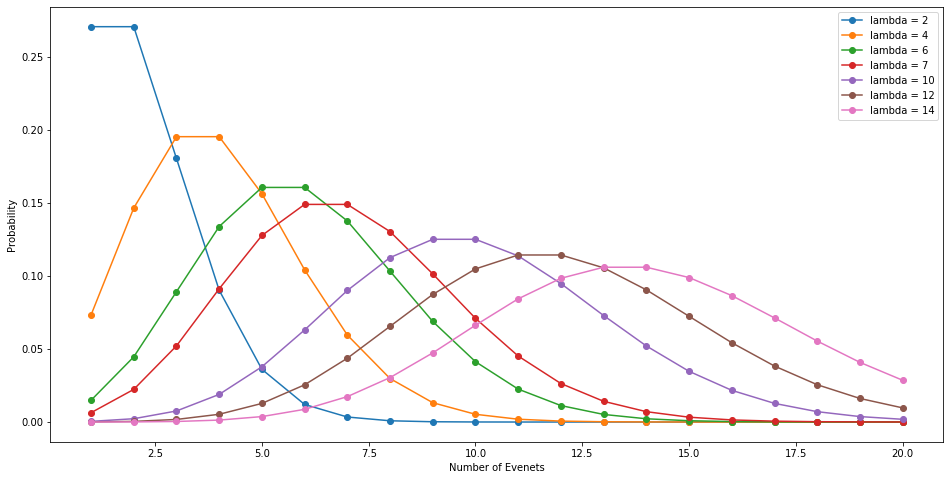

In [160]:
evntdata['Prob2'] =  list(map(poisson,evntdata['Numberofevents'].values , repeat(2)))
evntdata['Prob4'] =  list(map(poisson,evntdata['Numberofevents'].values , repeat(4)))
evntdata['Prob6'] =  list(map(poisson,evntdata['Numberofevents'].values , repeat(6)))
evntdata['Prob7'] =  list(map(poisson,evntdata['Numberofevents'].values , repeat(7)))
evntdata['Prob10'] =  list(map(poisson,evntdata['Numberofevents'].values , repeat(10)))
evntdata['Prob12'] =  list(map(poisson,evntdata['Numberofevents'].values , repeat(12)))
evntdata['Prob14'] =  list(map(poisson,evntdata['Numberofevents'].values , repeat(14)))

fig,(ax1) = subplots(nrows=1,
                     ncols=1,
                     sharex=False,
                     sharey=False,
                     figsize=(16,8))


ax1.plot(evntdata['Numberofevents'], evntdata['Prob2'], marker = 'o', label = 'lambda = 2')
ax1.plot(evntdata['Numberofevents'], evntdata['Prob4'], marker = 'o', label = 'lambda = 4')
ax1.plot(evntdata['Numberofevents'], evntdata['Prob6'], marker = 'o', label = 'lambda = 6')
ax1.plot(evntdata['Numberofevents'], evntdata['Prob7'], marker = 'o', label = 'lambda = 7')
ax1.plot(evntdata['Numberofevents'], evntdata['Prob10'], marker = 'o', label = 'lambda = 10')
ax1.plot(evntdata['Numberofevents'], evntdata['Prob12'], marker = 'o', label = 'lambda = 12')
ax1.plot(evntdata['Numberofevents'], evntdata['Prob14'], marker = 'o', label = 'lambda = 14')
ax1.set_xlabel('Number of Evenets')
ax1.set_ylabel('Probability')
ax1.legend(loc='best')
show()


#### Binomial Distribution and Poisson Distribution
Here, I would like to differentiate between binomial and poisson distribution. There are some problems which in contextual manner may be solved by both binomial and poisson distribution. However, we should use Poisson when following two conditions are met: 
- The total number of events n > 20 
- The proportion np < 10 

#### References


https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

https://en.wikipedia.org/wiki/Poisson_distribution#Occurrence

https://en.wikipedia.org/wiki/Markov_property


Bishop Pattern Recognition and Machine Learning 